# Assignment 4
Answer the following questions using Python. You should submit your notebooks by Thursday 2 November 2023 before 11:00 AM.
Then, you will be asked to answer a quiz based on this assignment via ClickUp during the lecture time on Thursday 2 November.


## Question 1

Consider `ais` data once again and after eliminating the categorical features, answer the following questions:

- a) Cluster the mentioned data set into $k=3$ groups using the $k$-means method.
- b) Visualize the clustering result using the variables `Bfat` and `Fe`.
- c) Obtain the frequency distribution of the males and females in each cluster (it is called the confusion matrix). 
- d) Obtain the mean, median and standard deviation of `Fe` and `Bfat` in each cluster. How do you interpret them?
- e) Re-execute Part (a) with $k=5$. Obtain appropriate evaluation metrics. Then, discuss possible improvements achieved by increasing the number of clusters.
- f) Obtain the optimum number of clusters (_Hint: use the elbow method which is plotting the wss vs. the number of clusters. To this end, you need a for loop ranging from k = 2 up to k = 10 for example_).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
import os
os.chdir("/Users/marcusnkadimeng/Downloads/stk353/Assignment 4")

ais_df = pd.read_csv("ais.txt", delimiter=' ')

In [3]:
# eliminating categorical attributes
X = ais_df.drop(["ID", "sex", "sport"], axis=1)
X

,RCC,WCC,Hc,Hg,Fe,BMI,SSF,Bfat,LBM,Ht,Wt
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6
...,...,...,...,...,...,...,...,...,...,...,...
197,4.90,7.6,45.6,16.0,90,27.56,67.2,11.79,82.00,183.9,93.2
198,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.00,183.5,80.0
199,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.00,183.1,73.8
200,4.97,8.8,43.0,14.9,233,22.34,60.4,11.50,63.00,178.4,71.1


In [9]:
# A)

# Choosing the number of clusters
k = 3

# Initialize a KMeans object and then fit it on the data
kmeans = KMeans(n_clusters = k, n_init = 50, random_state = 12345)
kmeans.fit(X)

clusters = kmeans.labels_
centers = kmeans.cluster_centers_


ais_df["Cluster"] = clusters + 1             # add the clusters with 1 since they index from 0.
ais_df

,ID,sex,sport,RCC,WCC,Hc,Hg,Fe,BMI,SSF,Bfat,LBM,Ht,Wt,Cluster
0,1,female,B_Ball,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,1
1,2,female,B_Ball,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,1
2,3,female,B_Ball,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,1
3,4,female,B_Ball,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,1
4,5,female,B_Ball,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,198,male,W_Polo,4.90,7.6,45.6,16.0,90,27.56,67.2,11.79,82.00,183.9,93.2,2
198,199,male,Tennis,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.00,183.5,80.0,2
199,200,male,Tennis,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.00,183.1,73.8,3
200,201,male,Tennis,4.97,8.8,43.0,14.9,233,22.34,60.4,11.50,63.00,178.4,71.1,3


In [11]:
## Explained variance ratio: between sum of squares / total sum of squares

wss = kmeans.inertia_ # within sum of squares

tss = np.sum(np.sum((X - X.mean()) ** 2)) # total sum of squares

bss = tss - wss # between sum of squares

tss, wss, bss, bss / tss # The last item is the Explained variance ratio as our metric

(772166.0617524752, 326377.00095002033, 445789.0608024549, 0.5773227844159726)

In [82]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, clusters)
silhouette_avg

0.34324577470626266

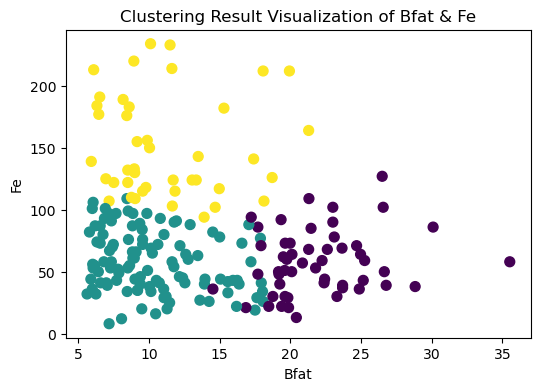

In [12]:
# B ) 
plt.figure(figsize = (6, 4))
plt.scatter(ais_df.Bfat, ais_df.Fe, c=clusters, cmap='viridis', s=50)
plt.xlabel('Bfat')
plt.xlabel('Bfat')
plt.ylabel('Fe')
plt.title('Clustering Result Visualization of Bfat & Fe')
plt.show()

In [13]:
# C)

# method 1: use groupby clause

# ais_df.groupby(['sex', 'Cluster']).Cluster.count()


# method 2: use pandas crosstab method

confusion_matrix = pd.crosstab(ais_df['sex'], ais_df["Cluster"], rownames=['Actual'], colnames=['Cluster'])
print(confusion_matrix)

Cluster   1   2   3
Actual             
female   49  46   5
male      3  62  37


In [85]:
# D)
cluster_stats = ais_df.groupby('Cluster')[['Fe', 'Bfat']].agg(['mean', 'median', 'std'])
# x2 = ais_df[["Cluster", 'Fe', 'Bfat']]
#x2.groupby("Cluster").agg(['mean', 'median', 'std'])

cluster_stats

Fe                         Bfat                  
               mean median        std       mean  median       std
Cluster                                                           
1         57.461538   55.0  25.504680  21.921538  21.310  3.734938
2         57.537037   54.5  24.428582  10.363704   9.515  3.528385
3        150.642857  136.0  40.714845  11.173810   9.840  4.072586

In [86]:
cluster_frequency = ais_df['Cluster'].value_counts(normalize=True)

cluster_frequency

2    0.534653
1    0.257426
3    0.207921
Name: Cluster, dtype: float64

In [39]:
# E)
ais_df2 = pd.read_csv("ais.txt", delimiter=' ')

X2 = ais_df2.drop(["ID", "sex", "sport"], axis=1)
X2

# Choosing a new number of clusters
k = 5

# Initialize a KMeans object and then fit it on the data
kmeans = KMeans(n_clusters = k, n_init = 50, random_state = 12345)
kmeans.fit(X2)

clusters2 = kmeans.labels_
centers2 = kmeans.cluster_centers_


ais_df2["Cluster"] = clusters + 1             # add the clusters with 1 since they index from 0.
ais_df2

,ID,sex,sport,RCC,WCC,Hc,Hg,Fe,BMI,SSF,Bfat,LBM,Ht,Wt,Cluster
0,1,female,B_Ball,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,1
1,2,female,B_Ball,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,1
2,3,female,B_Ball,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,1
3,4,female,B_Ball,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,1
4,5,female,B_Ball,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,198,male,W_Polo,4.90,7.6,45.6,16.0,90,27.56,67.2,11.79,82.00,183.9,93.2,2
198,199,male,Tennis,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.00,183.5,80.0,2
199,200,male,Tennis,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.00,183.1,73.8,3
200,201,male,Tennis,4.97,8.8,43.0,14.9,233,22.34,60.4,11.50,63.00,178.4,71.1,3


In [40]:
## Explained variance ratio: between sum of squares / total sum of squares

wss = kmeans.inertia_ # within sum of squares

tss = np.sum(np.sum((X2 - X2.mean()) ** 2)) # total sum of squares

bss = tss - wss # between sum of squares

tss, wss, bss, bss / tss # The last item is the Explained variance ratio as our metric

# if the variance ratio is close to 1, it means the clustering(k) approach is working well
# perhaps increasing the number of clusters works well

(772166.0617524752, 216078.39732823134, 556087.6644242438, 0.720165896908459)

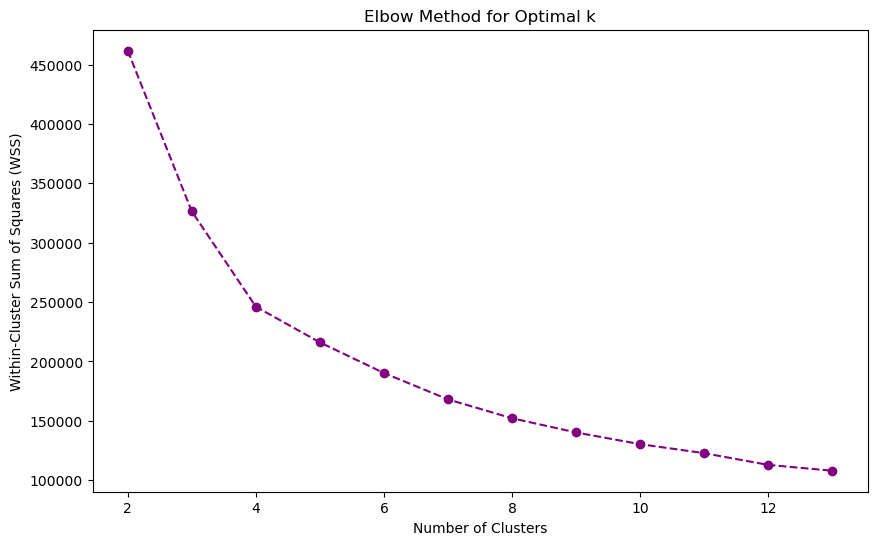

In [32]:
# Perform the elbow method

wss_values = []
k_values = range(2, 14)  # Range of k values from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=12345)
    kmeans.fit(X2)
    wss_values.append(kmeans.inertia_)
    
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, wss_values, marker='o', linestyle='--', color='purple')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

#### The plot indicates that there are bigger decreases in WSS values until k=4.
#### Subsequent clustering with a higher number of clusters does not show considerable decreases.
#### Therefore, I choose 5 as the optimum number of clusters

# Question 2

Remember `20newsgroups` data set which comprises around 18000 newsgroups posts on 
20 topics split into two subsets: one for training and the other one for testing. In Using the following code, you can obtain the train and test set.

In [36]:
from sklearn.datasets import fetch_20newsgroups

train_data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
test_data = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

X_train = train_data.data # The news
y_train = train_data.target # The topic of the news

X_test = test_data.data
y_test = test_data.target

The target variable (class/response variable) here is the topic of the newsgroups.

- a) Apply the Naive Bayes algorithm to predict the topic of a newsgroup.
  Show how cleaning the data improves the accuracy of the Naive Bayes model: to this end, you should first apply the Naive Bayes on the raw data, then apply it to the cleaned data and finally compare the yielding accuracy scores.
   (_Hint: you can also simply use the `text_claner.py` module to clean the text_).
- c) Does this trained model suffer from overfitting?

In [70]:
from text_cleaner import text_cleaner

# Clean train and test data
X_train_cleaned = [text_cleaner(text).values[0] for text in X_train]
X_test_cleaned = [text_cleaner(text).values[0] for text in X_test]

In [73]:
# Naive Bayes on raw data

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

vectorizer = CountVectorizer()     # Initializing the CountVectorizer()

# Convert text data to a document-term matrix
X_train_dtm = vectorizer.fit_transform(X_train)
# learn the vocab dictionary and transform the data into document-term-matrix

X_test_dtm = vectorizer.transform(X_test)
# transform new raw data into document-term matrix based on the training data


model = MultinomialNB()                          # Training the Naive Bayes
model.fit(X_train_dtm, y_train)

y_pred = model.predict(X_test_dtm)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5431492299522039


In [49]:
# checking whether the model is a good fit:

accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, model.predict(X_train_dtm))

accuracy_train, accuracy_test

(0.7454481173767015, 0.5431492299522039)

In [74]:
# Naive Bayes on cleaned data

# Ensure that the cleaned data is in the correct format
X_train_cleaned = [str(text) for text in X_train_cleaned]
X_test_cleaned = [str(text) for text in X_test_cleaned]

# Convert text data to a document-term matrix
X_train_dtm2 = vectorizer.fit_transform(X_train_cleaned)
# learn the vocab dictionary and transform the data into document-term-matrix

X_test_dtm2 = vectorizer.transform(X_test_cleaned)
# transform new raw data into document-term matrix based on the training data



In [83]:
model = MultinomialNB()                          # Training the Naive Bayes
model.fit(X_train_dtm2, y_train)

y_pred = model.predict(X_test_dtm2)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, model.predict(X_train_dtm2))
print("Accuracy for test data:", accuracy)
print("Accuracy for train data:", accuracy_train)

Accuracy for test data: 0.6267923526287839
Accuracy for train data: 0.8055506452183135


## The yielding accuracy score on the cleaned data is significantly higher than that of the raw data.

### Since the accuracy on the training data is significantly higher than the accuracy on the test data, it may indicate overfitting.